# 1. Clasificación Binaria

## Clasificación por nivel de experiencia

### 1. La variable 'experience_level' clasifica a los empleados en:
   
- EN: Entry-level (nivel de entrada)
- MI: Mid-level (nivel medio)
- SE: Seniorv (mas que medio)
- EX: Executive (alta dirección)

### 2. Clasificación binaria:

Grupo 0: EN y MI → poca o mediana experiencia
Grupo 1: SE y EX → mucha experiencia

### 3. ¿Para qué sirve?
   
Este modelo permite predecir si un perfil es de alta experiencia, basándose en variables como:
- employment_type (tipo de contrato)
- job_title o job_group (tipo de cargo)
- company_size (tamaño de empresa)
- remote_ratio o is_remote (nivel de trabajo remoto)
- company_location y employee_residence (ubicación)
- salary_in_usd
  
### 4. Aplicación real:
- Sistemas de recomendación de empleo
- Clasificación automática de candidatos por experiencia

### ✅ Tipos de datos con los que funciona mejor la regresión logística

#### 1. Variables predictoras numéricas (escaladas)

Ejemplos: edad, ingresos, años de experiencia, calificaciones

Por qué funcionan bien: la regresión logística modela una función lineal sobre estas variables; si están escaladas, el modelo converge más rápido y es más estable.

#### 2. Variables categóricas (codificadas en One-Hot o similar)

Ejemplos: tipo de contrato, sector, ubicación, tamaño de empresa

-  Importante: deben estar codificadas en valores numéricos. Lo ideal es usar:

- OneHotEncoder para variables sin orden lógico

- OrdinalEncoder si hay un orden entre las categorías

#### 3 Escalar valores numéricos, si el modelo es matemático

Porque esos modelos dependen de:

* distancias
* ecuaciones
* pesos/coeficientes
* optimización numéricas
* funciones matemáticas internas.

Y todo eso se distorsiona si las variables están en escalas muy distintas.

#### 4. Variables sin multicolinealidad alta
Si hay alta correlación entre variables, el modelo puede volverse inestable. Se recomienda eliminar o combinar variables redundantes.

#### 5. Datos sin muchos valores atípicos extremos
Valores extremos pueden afectar negativamente los coeficientes. Puede ser útil usar transformaciones como logaritmos o aplicar técnicas de detección de outliers.

**⚠️ Evitar usar con...**
Relaciones no lineales complejas: la regresión logística no captura bien patrones no lineales (usa modelos como árboles, redes o SVM en ese caso).

Variables con muchas clases en categóricas: pueden generar demasiadas columnas si haces One-Hot, volviendo el modelo más complejo e ineficiente.

**🎯 Recomendaciones prácticas**
* Escala los datos numéricos: con StandardScaler o MinMaxScaler.
* Codifica los datos categóricos: con OneHotEncoder o similar.
* Evita multicolinealidad: con df.corr() o VIF para detectar redundancia.
* Normaliza la variable objetivo: debe ser binaria (0/1) para regresión logística clásica.







## 1. Importar librerías

In [1]:
#visualizacion
import seaborn as sns
import matplotlib.pyplot as plt
#data
import pandas as pd
import numpy as np
#machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.multiclass import unique_labels
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# almacenar modelos
import joblib
#conectarse
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Data
*Para este contexto se utilizara la data cruda*
Y realizaremos de manera muy rápida la exploración y limpieza

In [7]:
df= pd.read_csv("/content/drive/MyDrive/CODIGOS _ia/ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [9]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


### 2.1 Variable objetivo

In [10]:
#convertir variable objetivo
df["experience_group"] = df["experience_level"].map({"EN": 0, "MI": 0, "SE": 1, "EX": 1})
# Crear variable objetivo binaria
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size', 'experience_group'],
      dtype='object')

### 2.2. Balance de las clases

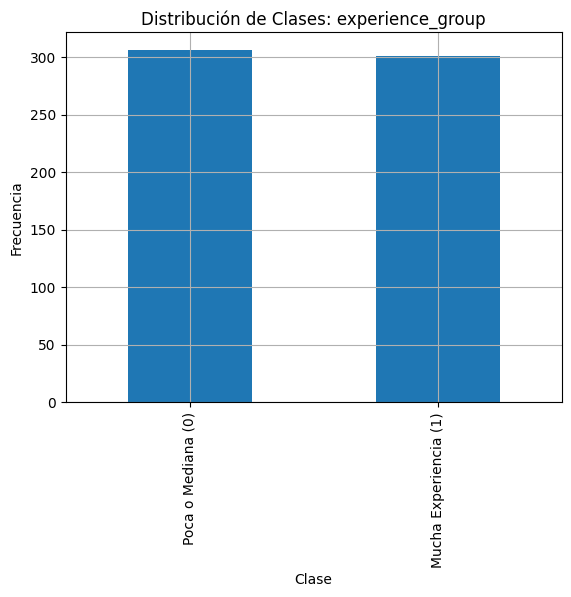

Conteo por clase:
 experience_group
1    306
0    301
Name: count, dtype: int64

Proporciones:
 experience_group
1    0.504119
0    0.495881
Name: proportion, dtype: float64


In [13]:
# Revisar el balance de clases

# Conteo de clases
df["experience_group"].value_counts().plot(kind='bar')
plt.title("Distribución de Clases: experience_group")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.xticks(ticks=[0, 1], labels=["Poca o Mediana (0)", "Mucha Experiencia (1)"])
plt.grid(True)
plt.show()

# imprimir los valores absolutos y proporciones
print("Conteo por clase:\n", df["experience_group"].value_counts())
print("\nProporciones:\n", df["experience_group"].value_counts(normalize=True))

### 2.3 Correlacción entre variables

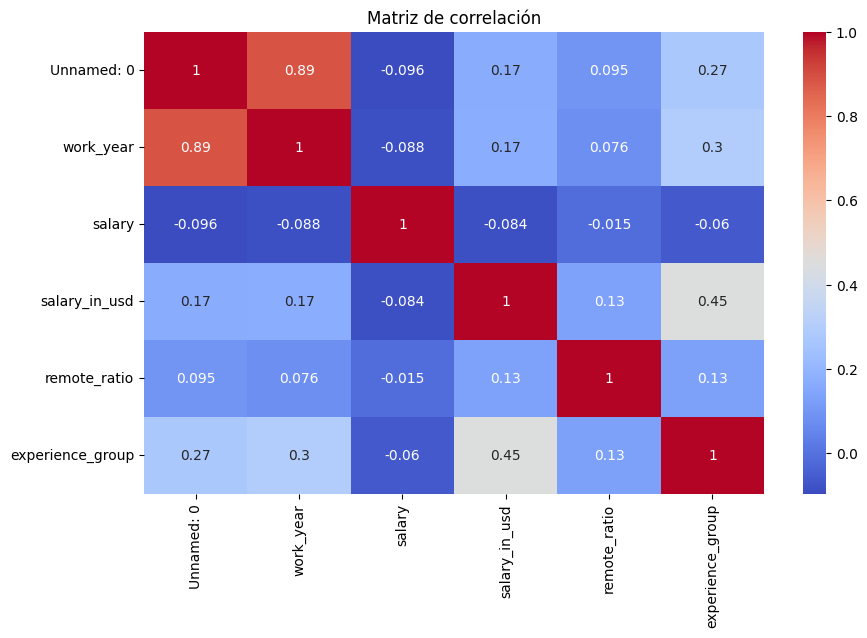

In [14]:
corr= df.corr(numeric_only=True) #hallar valor
# graficarlo
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

In [15]:
#eliminar columnas
df = df.drop(columns=["Unnamed: 0", "salary", "salary_currency"])

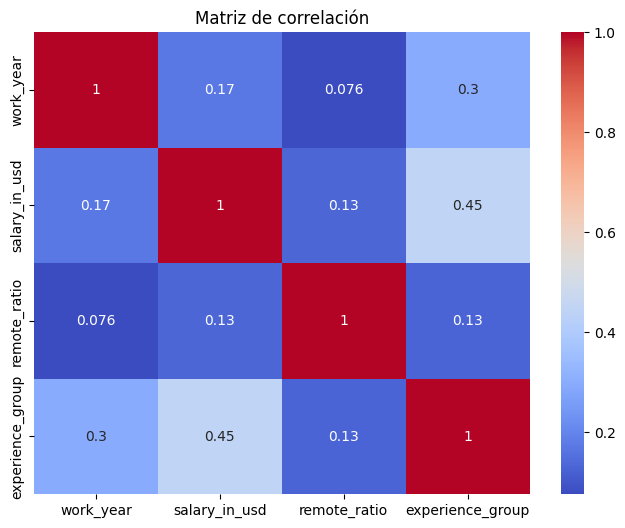

In [16]:
corr= df.corr(numeric_only=True) #hallar valor
# graficarlo
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

Dada la matrix decido no transformar variables y solo escalar las numericas, y no vectorizar otras.

### 2.4 Separar y partir datos

In [23]:
X = df[["work_year", "salary_in_usd", "remote_ratio"] ]
y = df["experience_group"]

In [24]:
X

,work_year,salary_in_usd,remote_ratio
0,2020,79833,0
1,2020,260000,0
2,2020,109024,50
3,2020,20000,0
4,2020,150000,50
...,...,...,...
602,2022,154000,100
603,2022,126000,100
604,2022,129000,0
605,2022,150000,100


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


### 2.5 Escalar datos de train y test

In [26]:
cols_numericas = ["work_year", "salary_in_usd", "remote_ratio"] # las variables a escalar
scaler = StandardScaler() # objeto que escala
X_train[cols_numericas] = scaler.fit_transform(X_train[cols_numericas]) # train
X_test[cols_numericas]  = scaler.transform(X_test[cols_numericas]) # test


## 3. Modelo: regresor logístico

In [27]:
#crear modelo
modelo = LogisticRegression(max_iter=300)
#entrenar modelo
modelo.fit(X_train, y_train)

# predicciones en train y test para verificar overfitting
y_pred_train = modelo.predict(X_train)
y_pred_test  = modelo.predict(X_test)

#matriz de confusion
mc= confusion_matrix(y_test, y_pred_test)

In [28]:
# métricas
print("Accuracy train:", accuracy_score(y_train, y_pred_train))
print("Accuracy test :", accuracy_score(y_test, y_pred_test))

Accuracy train: 0.756701030927835
Accuracy test : 0.7540983606557377


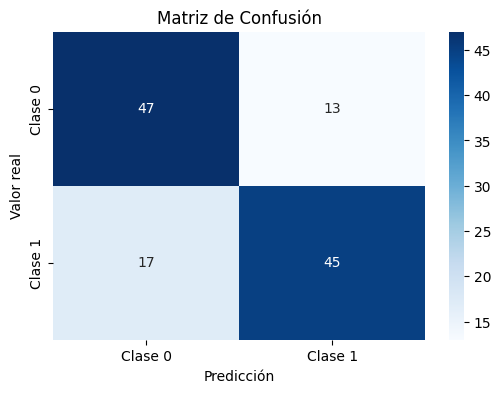

In [29]:

# Graficar
plt.figure(figsize=(6, 4))
sns.heatmap(mc, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión")
plt.show()


In [31]:

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_test))
print("=" * 40 + "\n")

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.73      0.78      0.76        60
           1       0.78      0.73      0.75        62

    accuracy                           0.75       122
   macro avg       0.76      0.75      0.75       122
weighted avg       0.76      0.75      0.75       122




## 5. Almacenar modelo  de clasificación

In [32]:
joblib.dump(modelo, "/content/drive/MyDrive/CODIGOS _ia/clasificacionBinaria.pkl")

['/content/drive/MyDrive/CODIGOS _ia/clasificacionBinaria.pkl']

In [33]:
df.to_csv("/content/drive/MyDrive/CODIGOS _ia/data_preprocesada4_sin_scaler.csv", index=False)
